In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ARdf = pd.read_json("Datasets/DatabaseBest.json")
SEPdf = pd.read_json("Datasets/CleanedSEPs.json")

Turning dates strings to timestamps

In [3]:
ARdf['TIMETAG'] = pd.to_datetime(ARdf.TIMETAG)
SEPdf['TIMETAG'] = pd.to_datetime(SEPdf.TIMETAG)

Keeping only their respective date components

In [4]:
ARdf['TIMETAG'] = ARdf['TIMETAG'].dt.date
SEPdf['TIMETAG'] = SEPdf['TIMETAG'].dt.date

In [5]:
SEPDatabase = ARdf.merge(SEPdf, on=['ARNUMBER', 'TIMETAG']).reset_index(drop=True)

We begin producing plots below.

## Solar Cycles

First, we observe that we have some emptry entries on our 'MAGTYPE' column of our Active Region data frame (ARdf). We will not need these, so we drop them with the next line.

In [6]:
ARdf.MAGTYPE.unique()

array(['ALPHA', 'BETA', 'BETA-GAMMA-DELTA', 'BETA-GAMMA', 'BETA-DELTA',
       'GAMMA-DELTA', 'DELTA', 'GAMMA', ''], dtype=object)

In [7]:
ARdf = ARdf.drop(ARdf.loc[ARdf['MAGTYPE']==''].index).reset_index(drop=True) # .drop() requires a list of indices

I specify the order I want for my hue on the legend.

In [8]:
HueOrd = ['$\\alpha$', '$\\beta$', '$\\gamma \\delta$', '$\\beta \\gamma$', '$\\beta \\delta$',
          '$\\beta \\gamma \\delta$', '$\\gamma$', '$\\delta$' ] 

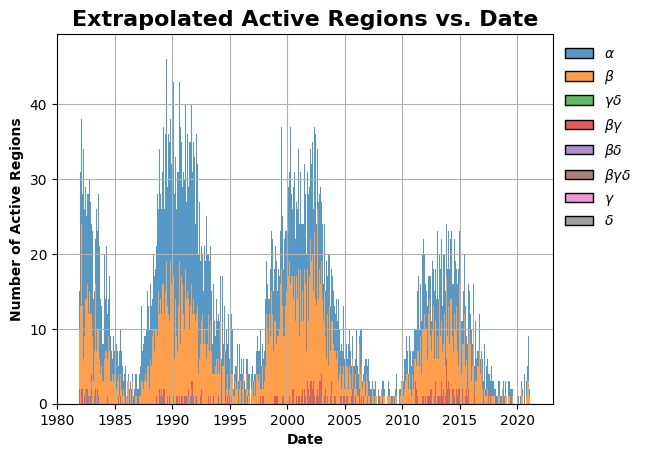

In [9]:
#plt.figure(figsize=(8,5), dpi=120)
ax = sns.histplot(data=ARdf,  x='TIMETAG', bins = 50, hue="HALE", multiple='stack',hue_order= HueOrd)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
plt.xlabel("Date", weight='bold')
plt.ylabel("Number of Active Regions", weight='bold')
plt.title("Extrapolated Active Regions vs. Date", fontsize=16, weight='bold')
plt.grid(True)
plt.show()
#plt.savefig("ExtARs.eps")

In [10]:
ARdfNOAA = ARdf.loc[ARdf['REAL(0)/PRED(1)'] == 0 ] # Selecting non-extrapolated entries

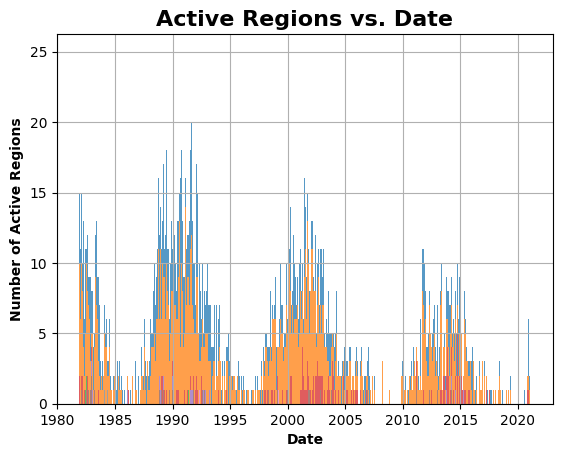

In [12]:
#plt.figure(figsize=(8,5), dpi=120)
ax2 = sns.histplot(data=ARdfNOAA,  x='TIMETAG', bins = 50, hue="HALE", multiple='stack',hue_order= HueOrd, \
                   legend=False)
plt.xlabel("Date", weight='bold')
plt.ylabel("Number of Active Regions", weight='bold')
plt.title("Active Regions vs. Date", fontsize=16, weight='bold')
plt.grid(True)
#plt.savefig("ARsvsDate.eps")

## Percentage of SEP events per Hale Class of an Active Region

In [13]:
CountsMagType = ( SEPDatabase['HALE'].value_counts() / len(SEPDatabase) ) *100

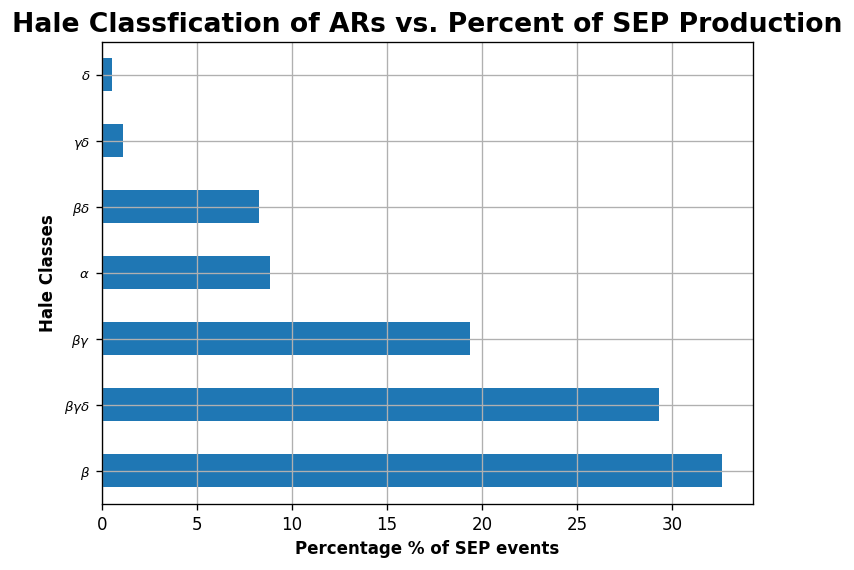

In [15]:
plt.figure(figsize=(7,5),dpi=120)
CountsMagType.plot(kind="barh")
plt.xlabel("Percentage % of SEP events", weight='bold')
plt.ylabel("Hale Classes",  weight='bold')
plt.title("Hale Classfication of ARs vs. Percent of SEP Production",  weight='bold', fontsize=16 )
plt.yticks(fontsize=8)
plt.grid(True)

## SEPs vs Dates

In [16]:
import matplotlib.dates as mdates

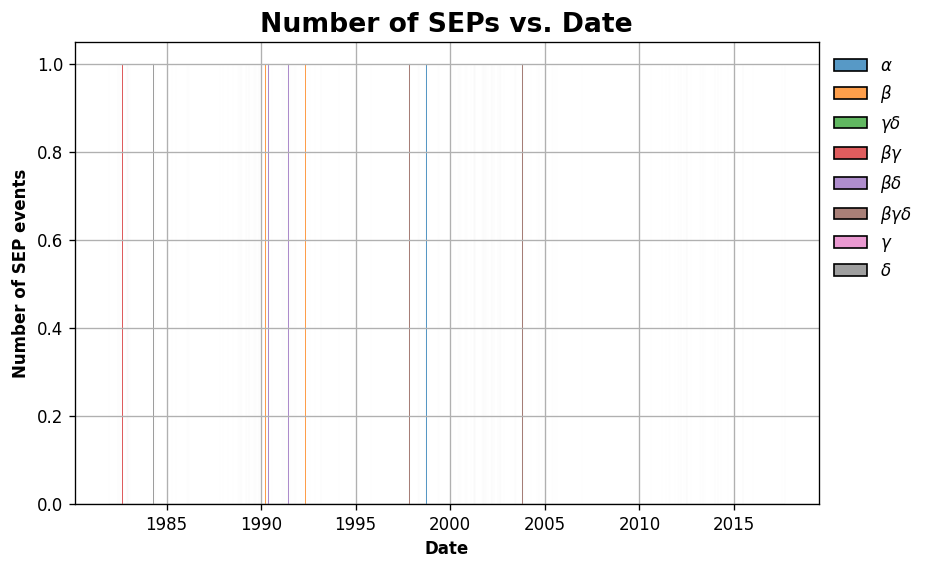

In [38]:
fig, axes = plt.subplots(figsize=(8,5), dpi=120)
ax4 = sns.histplot(data=SEPDatabase, x='TIMETAG', bins = 20 ,hue="HALE",hue_order= HueOrd ,multiple='stack', \
                   legend=True)
sns.move_legend(ax4, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
year_locator = mdates.YearLocator(5) #gets dates every two years for x-ticks
axes.xaxis.set_major_locator(year_locator) # sets the year locator
year_formatter = mdates.DateFormatter("%Y") #formats dates to show only year
axes.xaxis.set_major_formatter(year_formatter) #sets as major ticks on plot
plt.title("Number of SEPs vs. Date", fontsize=16, weight='bold')
plt.xlabel("Date", weight='bold')
plt.ylabel("Number of SEP events", weight='bold')
plt.grid(True)
#plt.savefig("/content/drive/MyDrive/SEP/SEPsvsDate.eps")

## Longitude vs SEPs

You can play around with different flux values inside of the sns.histplot() function.

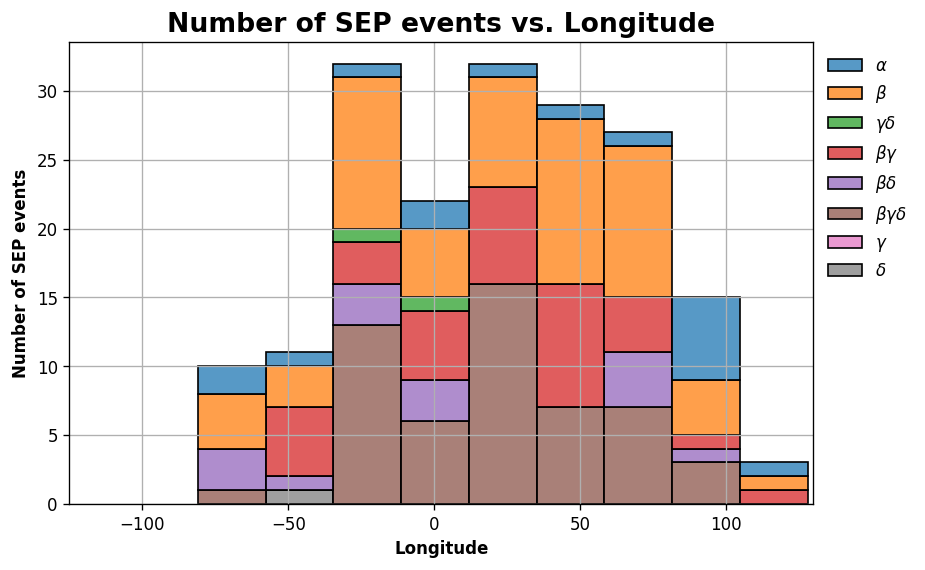

In [20]:
plt.figure(figsize=(8,5),dpi=120)
nbins=9
ax7 = sns.histplot(data=SEPDatabase.loc[SEPDatabase['PFlux_above10MeV']>=0], x='LOND', bins = nbins ,hue="HALE", hue_order= HueOrd,
                   multiple='stack', legend=True)#,
             #hue_order=[ 'ALPHA', 'GAMMA', 'BETA','DELTA'], alpha = 0.8, binrange = [-90,120] )
sns.move_legend(ax7, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
plt.xlabel("Longitude", weight='bold')
plt.ylabel("Number of SEP events", weight='bold')
plt.xlim([-125,130])
plt.title("Number of SEP events vs. Longitude", weight = "bold", fontsize=16)
plt.grid(True)
#plt.savefig("/content/drive/MyDrive/SEP/LONDvsSEPs.eps")

## Distribution of SEPs over the McIntosh Class Spectrum

To better visualize the next histrogram, we first sort our SEP database and then plot. 

In [26]:
sort = SEPDatabase.sort_values(by=['PEN', 'DIST','CL'], ascending=False)

***Note: On published paper, this histogram looks different because of another sorting variable used. 

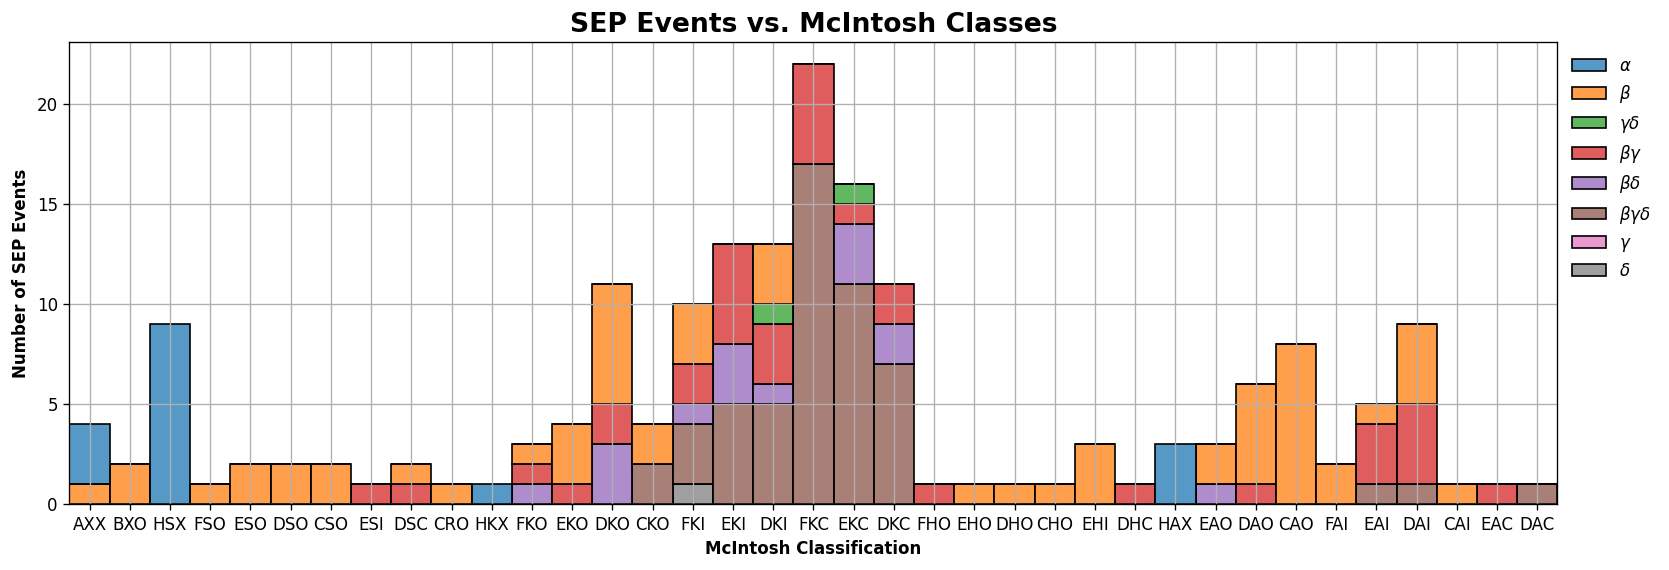

In [28]:
plt.figure(figsize=(16,5), dpi=120)
ax8 = sns.histplot(data=sort, x='Z', hue="HALE",hue_order= HueOrd, multiple='stack')
sns.move_legend(ax8, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
plt.xlabel("McIntosh Classification", weight='bold')
plt.ylabel("Number of SEP Events", weight='bold')
plt.title("SEP Events vs. McIntosh Classes", fontsize=16, weight='bold')
plt.margins(x=0)
plt.grid(True)
#plt.savefig("/content/drive/MyDrive/SEP/SEPsvsMcIntosh.eps")

## SEPs vs McIntosh Classes

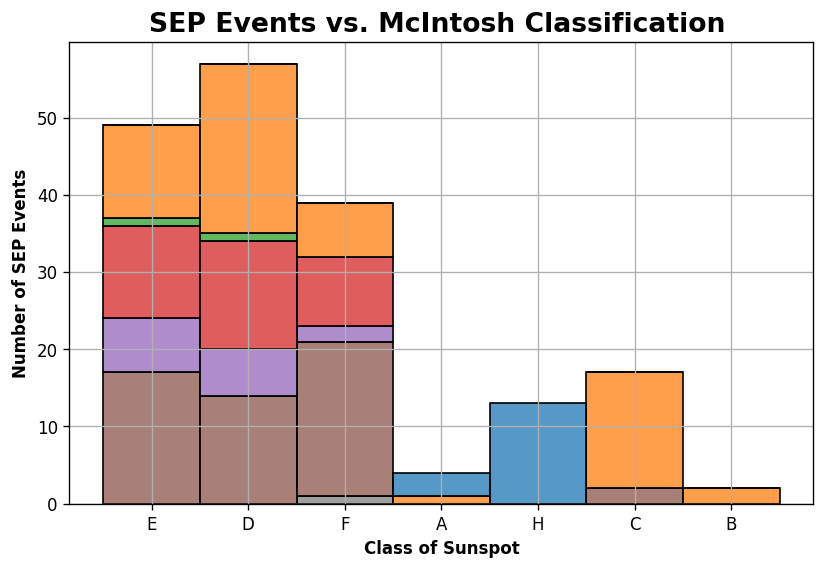

In [29]:
plt.figure(figsize=(8,5),dpi=120)
ax10 = sns.histplot(data=SEPDatabase, x= 'CL', hue="HALE", multiple='stack', hue_order=HueOrd, \
                    legend=False)
plt.xlabel("Class of Sunspot", weight='bold')
plt.ylabel("Number of SEP Events", weight='bold')
plt.title("SEP Events vs. McIntosh Classification ", fontsize=16, weight='bold')
plt.grid(True)
#plt.savefig("/content/drive/MyDrive/SEP/Class.eps")

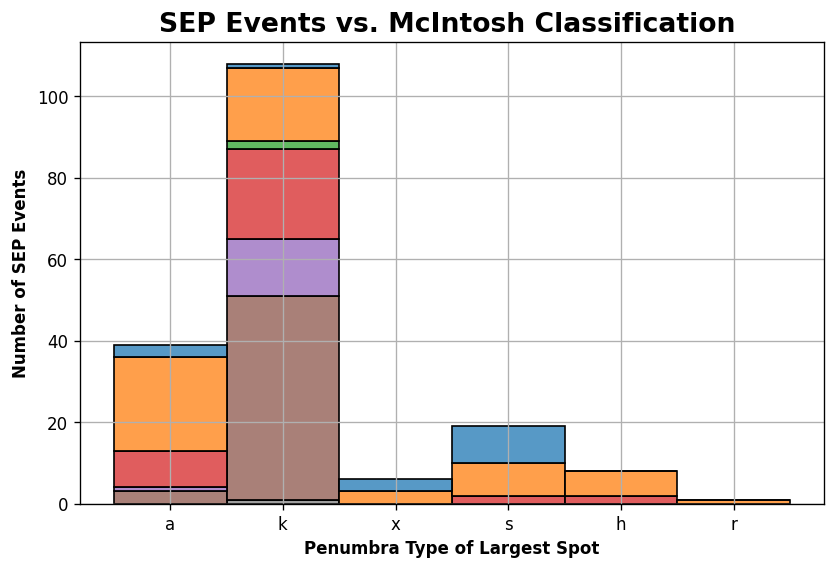

In [30]:
plt.figure(figsize=(8,5),dpi=120)
ax11 = sns.histplot(data=SEPDatabase, x= 'PEN', hue="HALE", multiple='stack', hue_order=HueOrd, \
                    legend=False)
plt.xlabel("Penumbra Type of Largest Spot", weight='bold')
plt.ylabel("Number of SEP Events", weight='bold')
plt.title("SEP Events vs. McIntosh Classification ", fontsize=16, weight='bold')
plt.grid(True)
#plt.savefig("/content/drive/MyDrive/SEP/LargestSpot.eps")

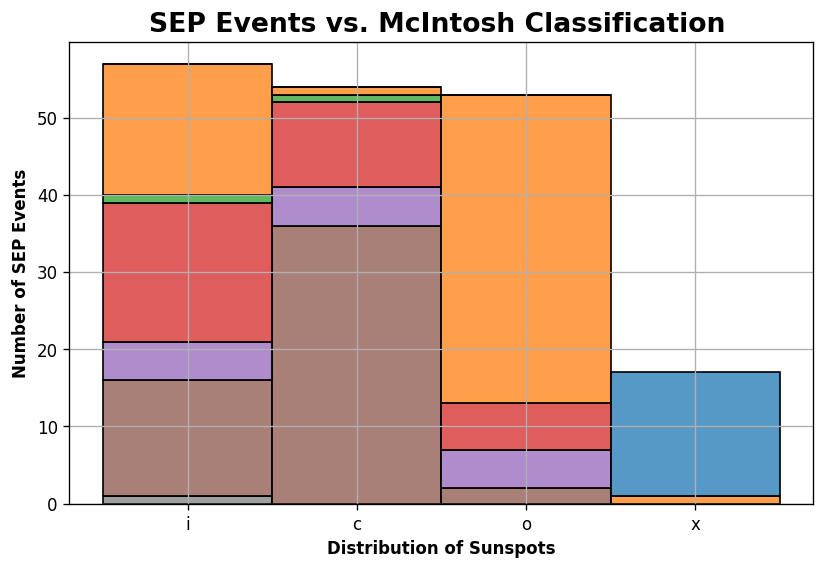

In [31]:
plt.figure(figsize=(8,5),dpi=120)
ax12 = sns.histplot(data=SEPDatabase, x= 'DIST', hue="HALE", multiple='stack', hue_order=HueOrd,\
                    legend=False)
plt.xlabel("Distribution of Sunspots", weight='bold')
plt.ylabel("Number of SEP Events", weight='bold')
plt.title("SEP Events vs. McIntosh Classification ", fontsize=16, weight='bold')
plt.grid(True)
#plt.savefig("/content/drive/MyDrive/SEP/Dist.eps")

## Combining Hale Class and McIntosh Components

To calculate the rates plotted, we divided the number of SEPs produced by Active Regions classified by a respective Hale class and second McIntosh component by the total number of true appearances of the same type of Active Regions, then mulplied by 100. By true appearances, we mean that no extrapolated Active Regions were considered here.

In [32]:
nPenHaleSEPdf = SEPDatabase[['PEN', 'HALE']].value_counts()

In [34]:
nPenHaleNOAAdf = ARdfNOAA[['PEN', 'HALE']].value_counts()

In [36]:
Perc = (nPenHaleSEPdf/nPenHaleNOAAdf)*100

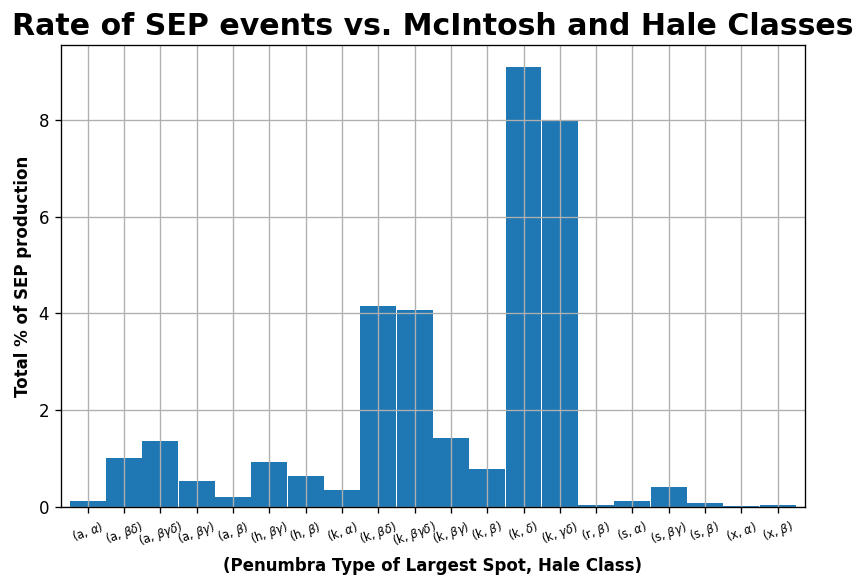

In [37]:
plt.figure(figsize=(8,5),dpi=120)
Perc.dropna().plot(kind= 'bar', width=0.99)
plt.xlabel("(Penumbra Type of Largest Spot, Hale Class)", weight = 'bold')
plt.xticks(fontsize=7, rotation=20)
plt.ylabel("Total % of SEP production", weight = 'bold')
plt.title("Rate of SEP events vs. McIntosh and Hale Classes", fontsize=18,\
          weight='bold')
plt.grid(True)
#plt.savefig("/content/drive/MyDrive/SEP/ratePEN_HALEvsSEPs.eps")

## Splitting Longitude into Regions:

We produce the rates by dividing the number of SEPs produced by an Active Region from a respective Hale class by the total number of true appearances of the same type of Active Region. By true appearances, we mean non-extrapolated Active Regions. First we find the bin separation.

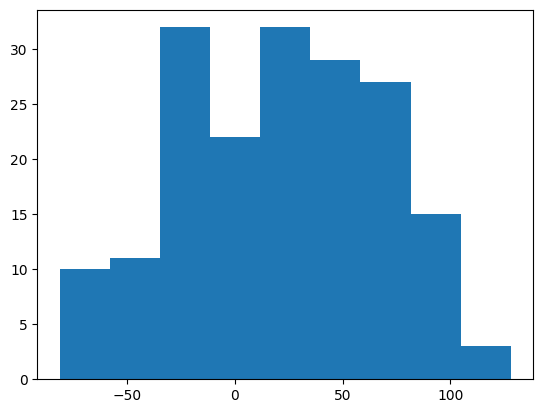

In [42]:
(a, LONDbins, _ ) =plt.hist(SEPDatabase['LOND'], bins = 9);

Then, we make a dictionary to call by keyword the different longitude regions we want to look at.

In [44]:
LONDbins

array([-81.        , -57.77777778, -34.55555556, -11.33333333,
        11.88888889,  35.11111111,  58.33333333,  81.55555556,
       104.77777778, 128.        ])

In [43]:
mskSEPs = {"First Two": (SEPDatabase["LOND"] >= -81) & (SEPDatabase["LOND"] < -34.55555556),
       "Second Two": (SEPDatabase["LOND"] >= -34.55555556) & (SEPDatabase["LOND"] < 11.88888889),
       "Third Two": (SEPDatabase["LOND"] >= 11.88888889) & (SEPDatabase["LOND"] < 58.33333333),
       "Last Three": (SEPDatabase["LOND"] >= 58.33333333)}

In [45]:
mskData = {"First Two": (ARdfNOAA["LOND"] >= -81) & (ARdfNOAA["LOND"] < -34.55555556),
       "Second Two": (ARdfNOAA["LOND"] >= -34.55555556) & (ARdfNOAA["LOND"] < 11.88888889),
       "Third Two": (ARdfNOAA["LOND"] >= 11.88888889) & (ARdfNOAA["LOND"] < 58.33333333),
       "Last Three": (ARdfNOAA["LOND"] >= 58.33333333)}

In [48]:
Proba_FirstTwo = (SEPDatabase.loc[mskSEPs['First Two']].value_counts(subset='HALE')/ \
ARdfNOAA.loc[mskData['First Two']].value_counts(subset='HALE'))

In [52]:
Proba_SecondTwo = (SEPDatabase.loc[mskSEPs['Second Two']].value_counts(subset='HALE')/ \
 ARdfNOAA.loc[mskData['Second Two']].value_counts(subset='HALE'))

In [53]:
Proba_ThirdTwo = (SEPDatabase.loc[mskSEPs['Third Two']].value_counts(subset='HALE')/ \
 ARdfNOAA.loc[mskData['Third Two']].value_counts(subset='HALE'))

In [58]:
Proba_LastThree = (SEPDatabase.loc[mskSEPs['Last Three']].value_counts(subset='HALE')/ \
ARdfNOAA.loc[mskData['Last Three']].value_counts(subset='HALE'))

In [59]:
series = [Proba_FirstTwo, Proba_SecondTwo, Proba_ThirdTwo, Proba_LastThree]

In [56]:
s1 = "$[-81^{\circ},-35^{\circ})$"
s2 = "$(-35^{\circ},12^{\circ})$"
s3 = "$(12^{\circ},58^{\circ}]$"
s4 = "$\geq 58^{\circ}$"

Text(0.5, 1.0, 'SEP Generation vs. Hale Classes of ARs ')

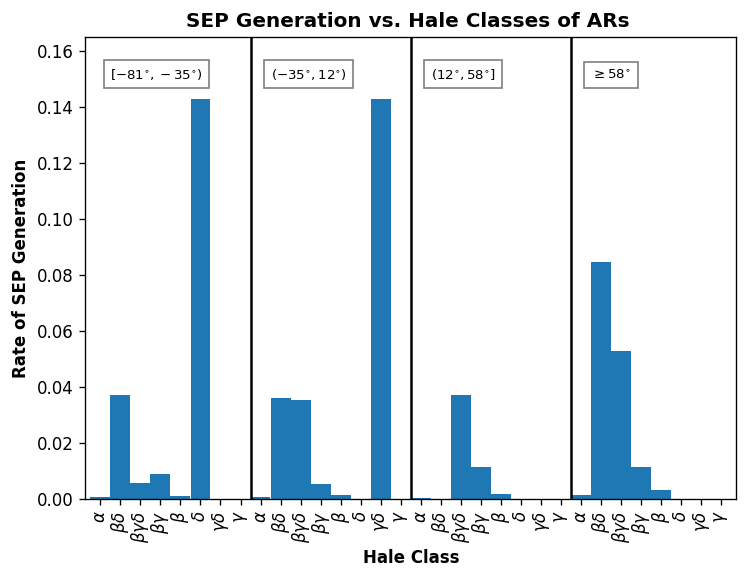

In [60]:
plt.figure(figsize= (7,5), dpi=120)
pd.concat(series).plot.bar(width =0.99)
plt.axvline(x=7.5, color="black")
plt.axvline(x=15.5, color="black")
plt.axvline(x=23.5, color="black")
plt.ylim(0, 0.165)
plt.text(0.5,0.15, s1, fontsize=8, bbox=dict(facecolor="none", alpha=0.5))
plt.text(8.5,0.15, s2, fontsize=8, bbox=dict(facecolor="none", alpha=0.5))
plt.text(16.5,0.15, s3, fontsize=8, bbox=dict(facecolor="none", alpha=0.5))
plt.text(24.5,0.15, s4, fontsize=8, bbox=dict(facecolor="none", alpha=0.5))
plt.ylabel("SEP Probability", weight="bold")
plt.xlabel("Hale Class", weight="bold")
plt.xlabel("Hale Class", weight="bold")
plt.ylabel("Rate of SEP Generation", weight="bold")
plt.title("SEP Generation vs. Hale Classes of ARs ", weight='bold')
#plt.savefig("/content/drive/MyDrive/SEP/rateSEPsvsHale.eps")